In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
from datetime import datetime as dt

In [3]:
# Read the datasets from Bitcoin, Ethereum, and Cardano
btc = pd.read_csv('Data/BTC.csv')
eth = pd.read_csv('Data/ETH.csv')
ada = pd.read_csv('Data/ADA.csv')

In [4]:
print(btc.info(),eth.info(),ada.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2160 non-null   int64  
 1   Name       2160 non-null   object 
 2   Symbol     2160 non-null   object 
 3   Date       2160 non-null   object 
 4

# Preprocessing and Prophet Modeling


In [5]:
def preprocess_and_model(crypto_df):
    # Preprocessing
    crypto_df = crypto_df.drop(['SNo','Name','Symbol','High','Low','Open','Marketcap','Volume'], axis=1)
    crypto_df['Date'] = crypto_df['Date'].apply(lambda date: dt.strptime(date,'%Y-%m-%d'))
    crypto_df = crypto_df.rename(columns={'Date':'ds','Close':'y'})
    train_percent = int(len(crypto_df)*0.80)
    test_periods = int(len(crypto_df)*0.20)
    crypto_train_df = crypto_df.iloc[:train_percent, :]
    
    # Modeling
    m = Prophet()
    m.fit(crypto_train_df)
    future = m.make_future_dataframe(periods=test_periods)
    forecast = m.predict(future)
    forecast_df = forecast[['ds','yhat','yhat_lower','yhat_upper']]
    predict_graph = m.plot(forecast)
    component_graph = m.plot_components(forecast)
    
    # Price prediction (yhat) vs acual price (y)
    price = crypto_df['y']
    acc_forecast = forecast[['ds','yhat']]
    crypto_accuracy_df = acc_forecast.join(price)
    crypto_accuracy_df = crypto_accuracy_df.set_index('ds')
    predict_accuracy_graph = crypto_accuracy_df.plot()
    
    return forecast_df, predict_graph, component_graph, predict_accuracy_graph
    

## Bitcoin

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
0,2013-04-29,-548.438960,-2016.232291,939.543471
1,2013-04-30,-522.606431,-1939.043981,936.771780
2,2013-05-01,-492.630374,-2030.043646,948.610398
3,2013-05-02,-463.247151,-1961.683740,1023.271254
4,2013-05-03,-418.493127,-1904.734949,995.945106
...,...,...,...,...
2985,2021-07-01,14762.799894,1859.154976,26596.365069
2986,2021-07-02,14787.888518,1843.519775,26747.115568
2987,2021-07-03,14814.958312,1993.519444,26749.736382
2988,2021-07-04,14819.533129,1653.963976,26894.488608


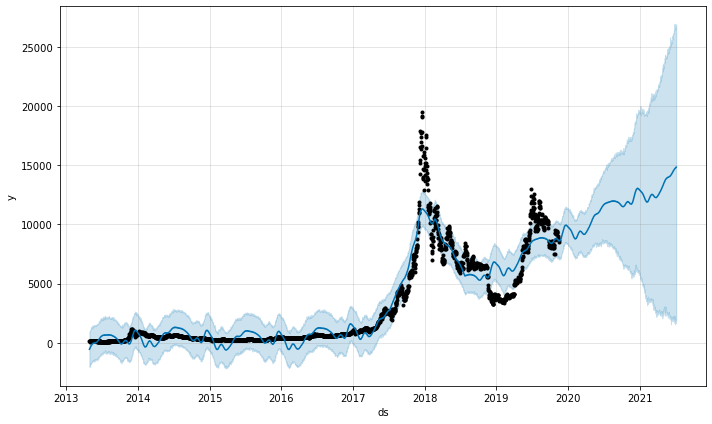

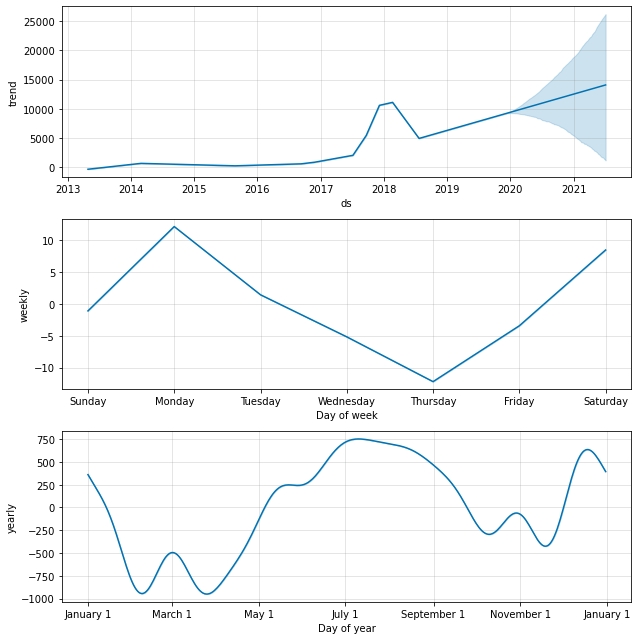

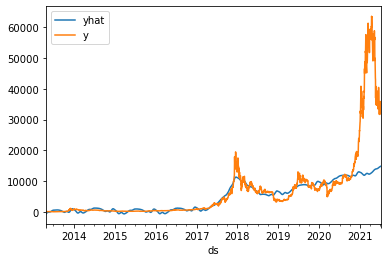

In [7]:
btc_forecast, btc_predictions, btc_components, btc_predict_accuracy = preprocess_and_model(btc)
btc_forecast

## Ethereum

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
0,2015-08-08,35.682738,-37.430660,115.588871
1,2015-08-09,34.498345,-40.091291,109.514964
2,2015-08-10,33.278415,-50.066233,113.180346
3,2015-08-11,32.846057,-44.411601,111.399214
4,2015-08-12,30.968138,-44.276533,107.751839
...,...,...,...,...
2155,2021-07-02,276.418900,-577.263430,1095.369699
2156,2021-07-03,275.911792,-557.848022,1112.104328
2157,2021-07-04,273.380356,-578.941234,1071.112356
2158,2021-07-05,270.864897,-594.546664,1095.346200


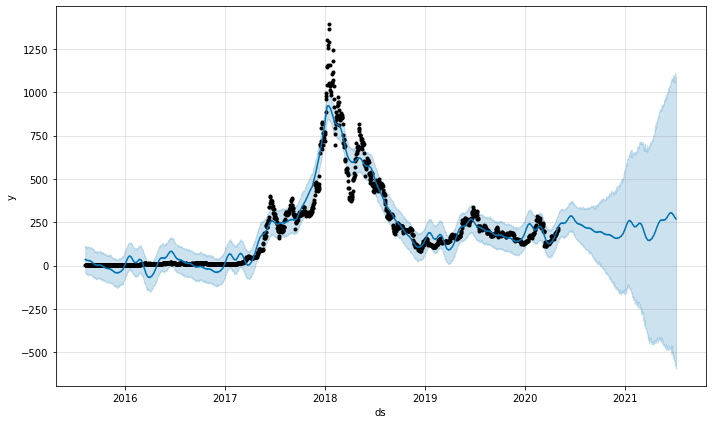

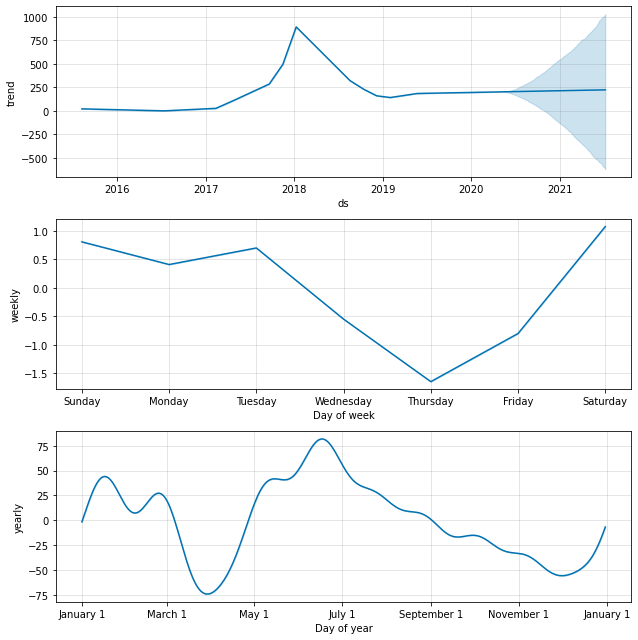

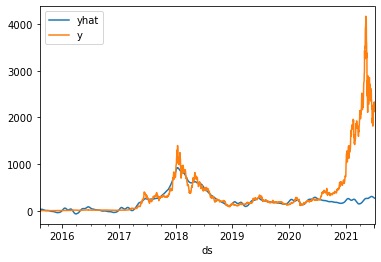

In [8]:
eth_forecast, eth_predictions, eth_components, eth_predict_accuracy = preprocess_and_model(eth)
eth_forecast

## Cardano (ADA)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
0,2017-10-02,-0.046318,-0.129035,0.036308
1,2017-10-03,-0.041667,-0.124840,0.035838
2,2017-10-04,-0.035487,-0.118427,0.042815
3,2017-10-05,-0.030848,-0.105922,0.048112
4,2017-10-06,-0.025024,-0.105755,0.059298
...,...,...,...,...
1368,2021-07-01,0.225419,-0.041736,0.507704
1369,2021-07-02,0.226914,-0.040093,0.515384
1370,2021-07-03,0.231753,-0.026613,0.524713
1371,2021-07-04,0.232814,-0.026272,0.520342


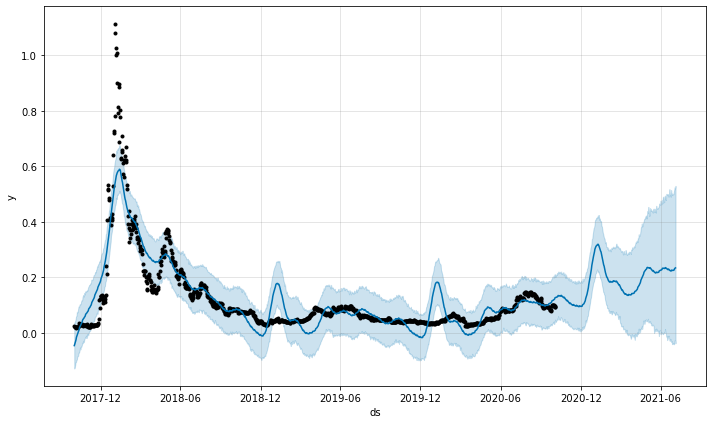

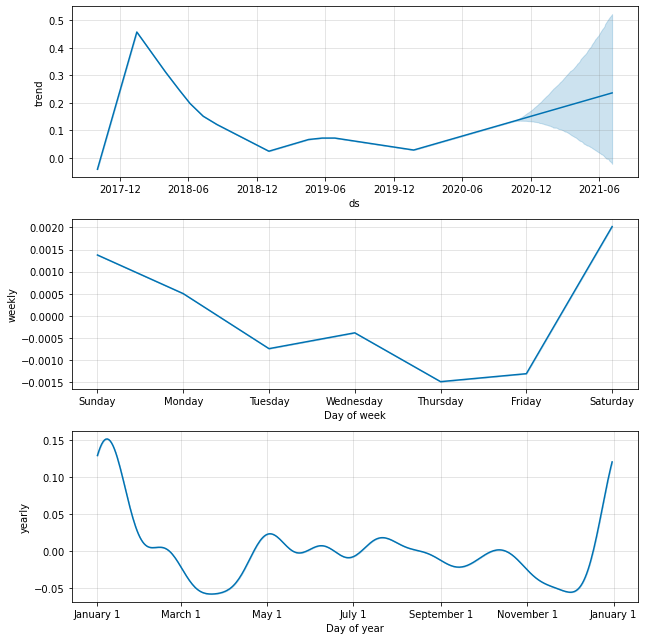

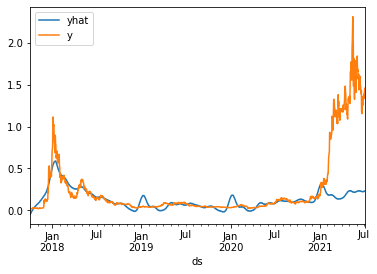

In [9]:
ada_forecast, ada_predictions, ada_components, ada_predict_accuracy = preprocess_and_model(ada)
ada_forecast